In [34]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime


path_order = "orders.csv"
path_products = "products.csv"

colnames_order=['OrderID', 'OrderDate', 'ProductID', 'UnitPrice', 'Quantity', 'Discount']
colnames_prod=['ProductID', 'ProductName', 'QuantityPerUnit', 'UnitCost', 'UnitPrice', 'CategoryName']

order = pd.read_csv(path_order, names=colnames_order, header=None)
prod = pd.read_csv(path_products, names=colnames_prod, header=None)

order

,OrderID,OrderDate,ProductID,UnitPrice,Quantity,Discount
0,OrderID,OrderDate,ProductID,UnitPrice,Quantity,Discount
1,10248,2007-01-30,11,28.62,12,0.0
2,10248,2007-01-30,42,14.04,10,0.0
3,10248,2007-01-30,72,12.71,5,0.0
4,10249,2006-01-29,14,22.8,9,0.0
...,...,...,...,...,...,...
2168,11083,2006-06-16,37,4.5,7,0.0
2169,11083,2006-06-16,42,15.65,10,0.0
2170,11083,2006-06-16,47,25.5,5,0.0
2171,11083,2006-06-16,51,99.9,3,0.0299999993294477


In [21]:
# Определите число уникальных продуктов в каждой категории.

Category = {}
CategoryName = prod['CategoryName'][1]
Category[CategoryName] = '0'


for i in range(1, len(prod['CategoryName'])):
    if(prod['CategoryName'][i] == CategoryName):
        Category[CategoryName] = str(int(Category[CategoryName]) +   1)
    else:
        Category[prod['CategoryName'][i]] = '1'
        CategoryName = prod['CategoryName'][i]
        
print("Число уникальных продуктов в каждой категории")
print(Category)


Число уникальных продуктов в каждой категории
{'Фрукты': '9', 'Овощи': '16', 'Крупы': '4', 'Морепродукты': '7', 'Приправы': '11', 'Молочные продукты': '6', 'Кондитерские изделия': '17', 'Мясо/Птица': '7'}


In [22]:
# Выведите все продукты в категории "Морепродукты".
NameSeafood = []
for i in range(1, len(prod['CategoryName'])):
    if(prod['CategoryName'][i] == 'Морепродукты'):
        NameSeafood.append(prod['ProductName'][i])
print("Все продукты в категории Морепродукты")        
print(NameSeafood)

Все продукты в категории Морепродукты
['Омары', 'Кальмары', 'Креветки', 'Крабовые палочки', 'Мидии мини', 'Креветки мини', 'Мидии']


<Figure size 1440x720 with 0 Axes>

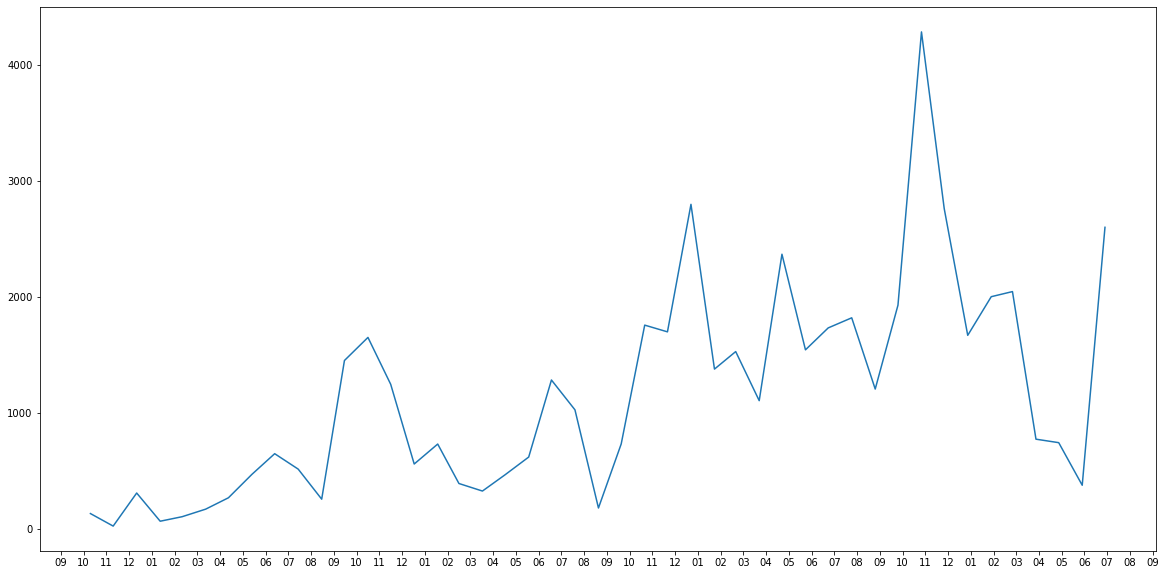

In [54]:
# Выведите график числа заказов за каждый прошедший месяц.

Date = {}
for i in range(1, len(order['OrderDate'])):
    OrderDate = order['OrderDate'][i]
    Date[OrderDate[:7]] =  '0'
for i in range(1, len(order['OrderDate'])):
    OrderDate = order['OrderDate'][i]
    Date[OrderDate[:7]] = str(int(Date[OrderDate[:7]]) + int(order['Quantity'][i]))

list_keys = list(Date.keys())
list_keys.sort()
dates = []

values_date = []
for i in list_keys:
    dates.append(i)
    values_date.append(int(Date[i]))


fig, ax = plt.subplots(figsize=(20,10))

ax.xaxis.set_major_locator(matplotlib.dates.DayLocator(interval=30))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))

dates = matplotlib.dates.date2num(dates)

ax.plot(dates, values_date)


plt.show()

In [13]:
# Заведите столбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества,
# стоимости единицы товара и скидки). Определите самые дорогие заказы (сгруппировав по OrderID)

order = order.assign(OrderSum = lambda x:'')
order['OrderSum'][0] = 'OrderSum' 

for i in range(1, len(order['OrderSum'])):
    order['OrderSum'][i] = (float(order['UnitPrice'][i]) * float(order['Quantity'][i]) * (1 - float(order['Discount'][i])))
    
order


,OrderID,OrderDate,ProductID,UnitPrice,Quantity,Discount,OrderSum
0,OrderID,OrderDate,ProductID,UnitPrice,Quantity,Discount,OrderSum
1,10248,2007-01-30,11,28.62,12,0.0,343.44
2,10248,2007-01-30,42,14.04,10,0.0,140.4
3,10248,2007-01-30,72,12.71,5,0.0,63.55
4,10249,2006-01-29,14,22.8,9,0.0,205.2
...,...,...,...,...,...,...,...
2168,11083,2006-06-16,37,4.5,7,0.0,31.5
2169,11083,2006-06-16,42,15.65,10,0.0,156.5
2170,11083,2006-06-16,47,25.5,5,0.0,127.5
2171,11083,2006-06-16,51,99.9,3,0.0299999993294477,290.709


In [14]:
Sum_orders = {}

for i in range(1, len(order['OrderID'])):
    Sum_orders[ order['OrderID'][i]] =  '0'
    
for i in range(1, len(order['OrderID'])):
    Sum_orders[order['OrderID'][i]] = float(Sum_orders[order['OrderID'][i]]) + float(order['OrderSum'][i])
    
sorted_orders = sorted(Sum_orders.values())

print("Самые дорогие 5 заказов:")
for i in range(len(sorted_orders)-1, len(sorted_orders)-6, -1):
    print("OrderID: ",list(Sum_orders.keys())[list(Sum_orders.values()).index(sorted_orders[i])] , "Сумма заказа: ", sorted_orders[i])



Самые дорогие 5 заказов:
OrderID:  10612 Сумма заказа:  33479.95
OrderID:  10991 Сумма заказа:  30370.71988686025
OrderID:  10961 Сумма заказа:  23757.368999668437
OrderID:  10962 Сумма заказа:  21397.63
OrderID:  10530 Сумма заказа:  21352.45


In [16]:
# Определите продукты с максимальной стоимостью за шт. (не за единицу товара)

Product_Cost = {}

for i in range(1, len(prod['ProductName'])):
    Product_Cost[ prod['ProductName'][i]] =  '0'
    
for i in range(1, len(prod['ProductName'])):
    Product_Cost[prod['ProductName'][i]] = float(Product_Cost[prod['ProductName'][i]]) + (float(prod['UnitPrice'][i]) / float(prod['QuantityPerUnit'][i]))
    
sorted_product = sorted(Product_Cost.values())

print("Самые дорогие 5 продуктов за шт:")

for i in range(len(sorted_product)-1, len(sorted_product)-9, -1):
    print(f"{'Продукт: ' + list(Product_Cost.keys())[list(Product_Cost.values()).index(sorted_product[i])]:<25} Стоимость продукта: {sorted_product[i]}")


Самые дорогие 5 продуктов за шт:
Продукт: Перец чили       Стоимость продукта: 199.5
Продукт: Креветки         Стоимость продукта: 123.79
Продукт: Блинчики с начинкой Стоимость продукта: 81.0
Продукт: Рис              Стоимость продукта: 45.6
Продукт: Пирожное с черносливом Стоимость продукта: 43.9
Продукт: Фарш говяжий     Стоимость продукта: 33.25
Продукт: Пирожное Восточное Стоимость продукта: 31.23
Продукт: Прованские травы Стоимость продукта: 25.89
